<a href="https://colab.research.google.com/github/nwallz/GitHub-Automation-scripts/blob/main/_WineQualityPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import load_model
# create and train your model here
# save the model to a file
model.save('my_model.h5')
# load the model from the file
loaded_model = load_model('my_model.h5')

In [ ]:
plt.style.use('dark_background')

In [ ]:
df=pd.read_csv("/content/WineQuality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.shape

(1143, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


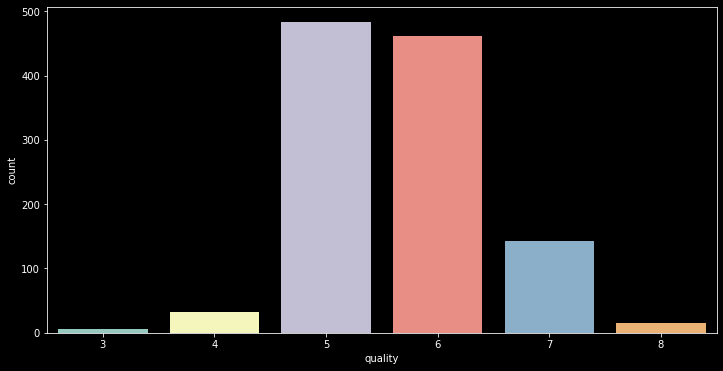

In [ ]:
plt.figure(figsize= (12,6))
sns.countplot(df["quality"])
plt.show()

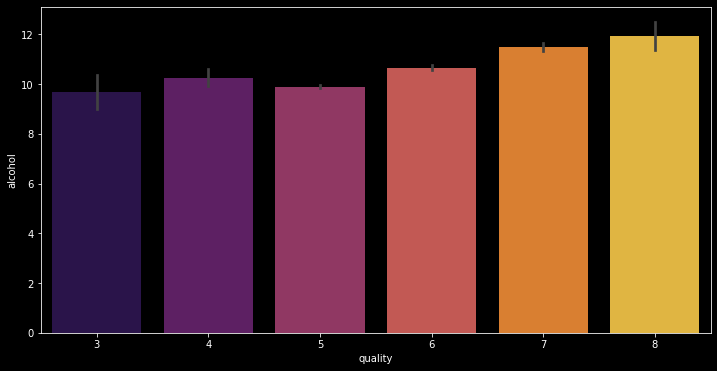

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='quality', y='alcohol', data=df, palette='inferno')
plt.show()

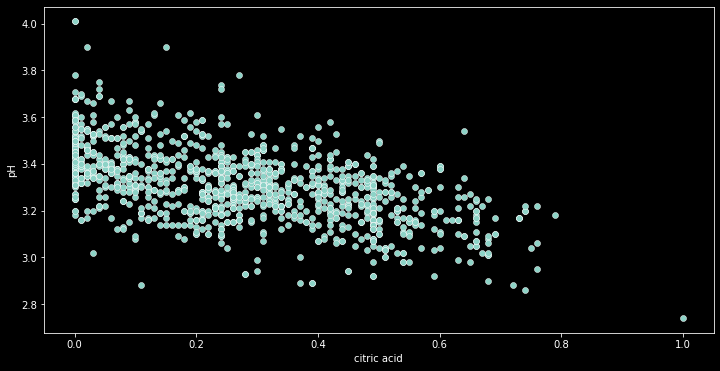

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='pH', x='citric acid', data=df)
plt.show()

<Figure size 864x432 with 0 Axes>

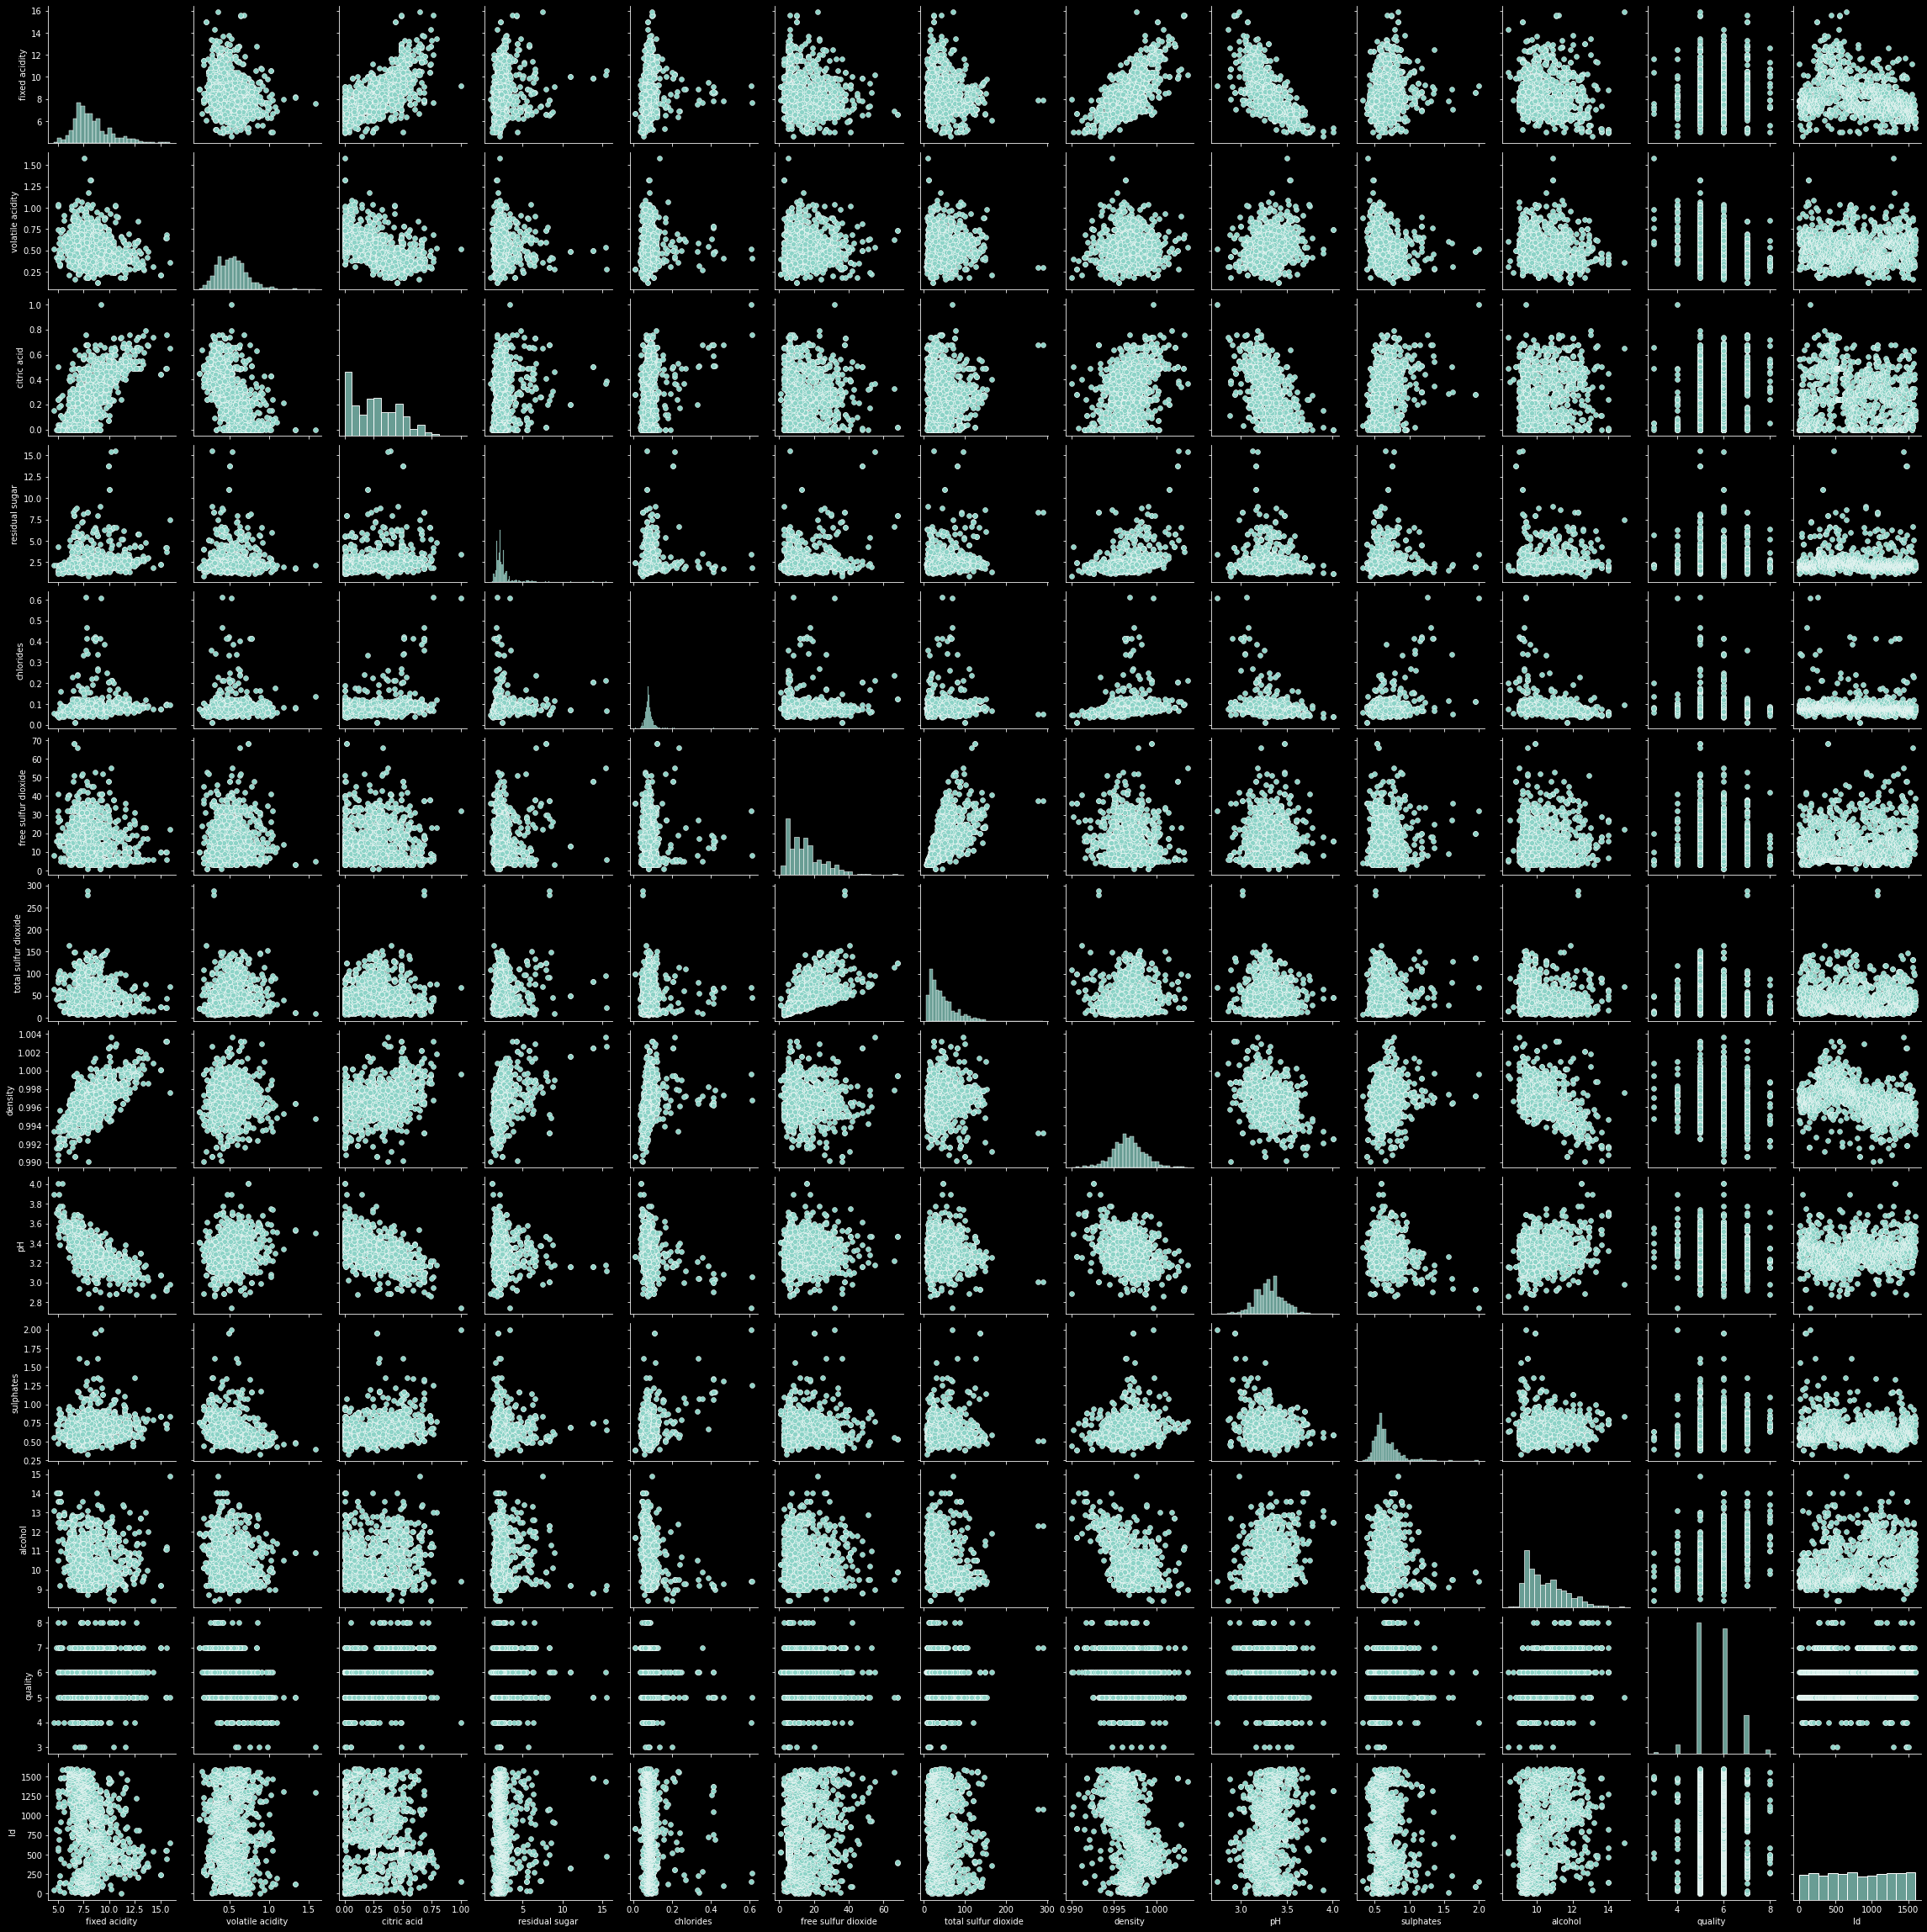

In [ ]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show()

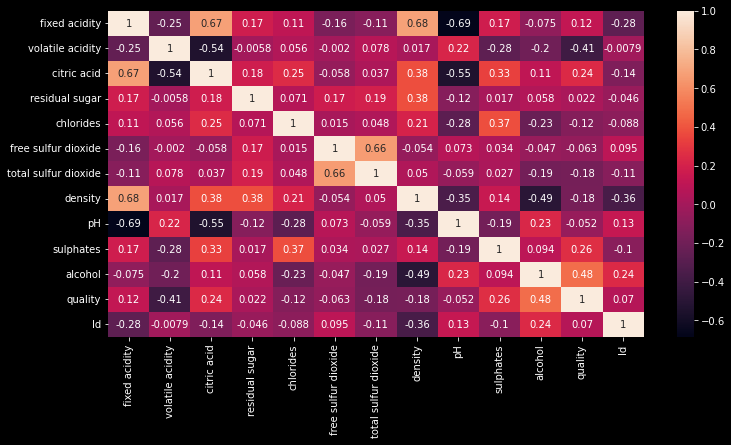

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
x=df.drop(['quality'], axis=1)
y=df['quality']

Data Preprocessing

In [ ]:
#oversampling
from imblearn.over_sampling import SMOTE
os=SMOTE()
x_res, y_res= os.fit_resample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_res, y_res, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscale=StandardScaler().fit(x_train)
x_train_std= stdscale.transform(x_train)
x_test_std= stdscale.transform(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

Model Building

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_std, y_train)
predictions=lr.predict(x_test_std)
accuracy_score(y_test, predictions)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.656896551724138

In [ ]:
from joblib import dump
# replace model with the name of your trained model
dump(lr, './lr.joblib')

NameError: ignored

In [ ]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_std, y_train)
predictions=dt.predict(x_test_std)
accuracy_score(y_test, predictions)

0.7810344827586206

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_std, y_train)
predictions=rf.predict(x_test_std)
accuracy_score(y_test, predictions)

0.846551724137931

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_std, y_train)
predictions=svc.predict(x_test_std)
accuracy_score(y_test, predictions)

0.7689655172413793

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
matrix=confusion_matrix(x_test,y_test)
print(matrix)